In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm


In [2]:
df = pd.read_excel("outlierdata1.xlsx")

In [3]:
df.head()

,Age,Income
0,20,27000
1,25,28000
2,30,31000
3,35,30000
4,21,32000


In [1]:
# Remove Outlier based on Quartile and return two new dataframes df_out rows without outliers, df_rem is dataframe with 
# outliers 

def remove_outlier_quartile(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    df_rem = df_in.loc[(df_in[col_name] <= fence_low) | (df_in[col_name] >= fence_high)]
    return df_out, df_rem

# Remove Outlier based on z score and return new dataframe df_out with outliers removed and 
# data frame with rows of the outliers df_rem

def remove_outlier_zscore(df_in, col_name, zscore = 3):
    
    from scipy import stats
    
    df_out = df_in[(np.abs(stats.zscore(df_in[col_name])) < zscore).all(axis=1)]
    df_rem = df_in[(np.abs(stats.zscore(df_in[col_name])) >= zscore).all(axis=1)]
    return df_out, df_rem
    



In [20]:
len(df_new)

11

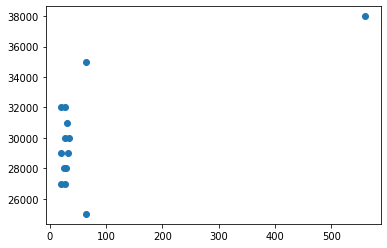

In [5]:
plt.scatter(df['Age'], df['Income'])

count     14.000000
mean      70.357143
std      141.662441
min       20.000000
25%       25.500000
50%       28.500000
75%       34.250000
max      560.000000
Name: Age, dtype: float64

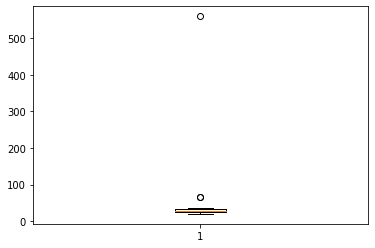

In [8]:
plt.boxplot(df['Age'])
df['Age'].describe()

{'whiskers': [<matplotlib.lines.Line2D at 0x16c46dca320>,
 'caps': [<matplotlib.lines.Line2D at 0x16c46dcaa20>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c46dc1ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x16c46dcae48>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c46dd3438>],
 'means': []}

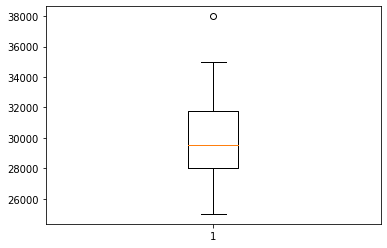

In [7]:
plt.boxplot(df['Income'])

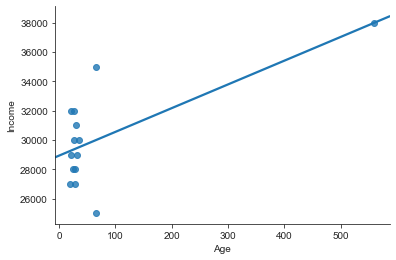

In [10]:
sns.set_style('ticks')
sns.regplot(df['Age'], df['Income'], ci=None)
sns.despine()  

In [15]:

df2 = df[(np.abs(stats.zscore(df)) < 2).all(axis=1)]

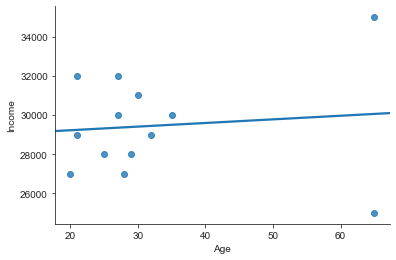

In [16]:
sns.set_style('ticks')
sns.regplot(df2['Age'], df2['Income'], ci=None)
sns.despine()  